<a href="https://colab.research.google.com/github/Trinityas/Kotlincourse/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm

In [ ]:
#Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california= fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["PRICE"] = california.target #target variable(median house value)

In [ ]:
#Dataset first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#Check for missing Values
print("\nMising Values:")
print(df.isnull().sum())


Mising Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [ ]:
#Summarry statistics
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.6

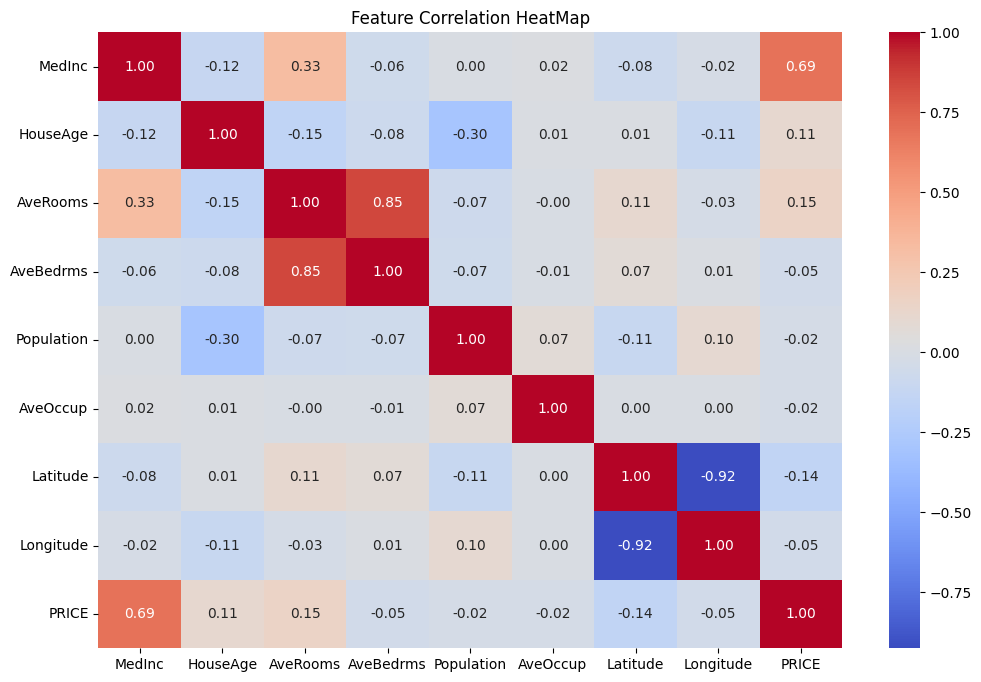

In [ ]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation HeatMap")
plt.show()

In [ ]:
from re import X
#split dataset into features (X)  and target (y)
X=df.drop("PRICE",axis=1)#Independent variable
y=df["PRICE"]#Dependent variable

In [ ]:
#Train-test split (80% training , 20% testing)
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Feature scaling (Standardaziation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
#Train the multiple linear regressin model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#prediction
y_pred =  model.predict(X_test_scaled)

In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
#model evaluation
r2 = r2_score (y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [ ]:
#AIC and BIC calculation (using statsmodels) are essential tools in multiple linear regression for selecting the best model
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train,X_train_const).fit()
aic = ols_model.aic
bic = ols_model.bic

In [ ]:
#Print performance metrics
print("\n Model Evaluation Metrics:")
print(f"R-square(R2): {r2:.4f}")
print(f"Mean Absolute Error(MAE):{mae:.4f}")
print(f"Mean Squared Error(MSE):{mse:.4f}")
print(f"Root Mean Squares Error(RMSE):{rmse:.4f}")
print(f"Akaike Information Criterion(AIC):{aic:.4f}")
print(f"Bayesian Information Criterion(BIC):{bic:.4f}")


 Model Evaluation Metrics:
R-square(R2): 0.5758
Mean Absolute Error(MAE):0.5332
Mean Squared Error(MSE):0.5559
Root Mean Squares Error(RMSE):0.7456
Akaike Information Criterion(AIC):36013.6303
Bayesian Information Criterion(BIC):36083.0369


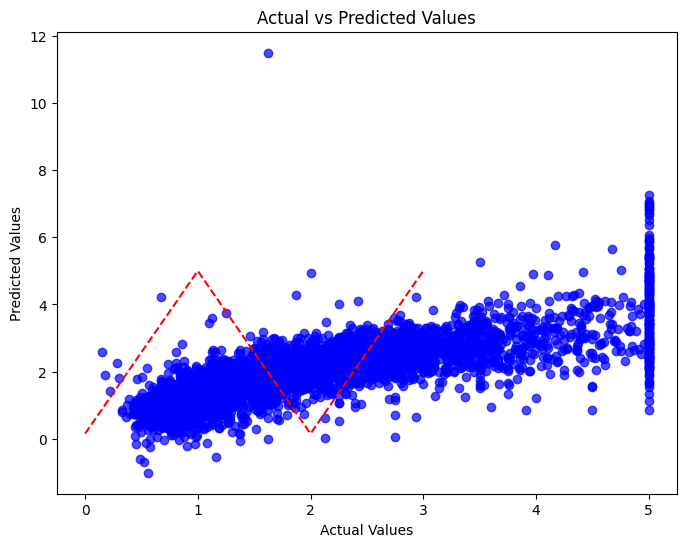

In [ ]:
#Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test),max(y_test),min(y_test),max(y_test)], color="red",linestyle="--")

In [ ]:
#---NEW FEATURE:USER INPUT PREDICTION---
print("\n Enter feature values to predict house price")

#Prompt user to enter values to all features
user_input=[]
for feature in X.columns:
  value =  float(input(f"Enter values for{feature}: "))
  user_input.append(value)

#Convert user input into Numpy ARRAY and scale it
user_input_array = np.array(user_input).reshape(1,-1)
user_input_scaled = scaler.transform(user_input_array)

#predic house price
predicted_price = model.predicy(user_input_scaled)
print(f"\n Predicted House Price: Ksh{predicted_price[0]:,.2f}")



 Enter feature values to predict house price
